In [1]:
import sys
sys.path.append("..")
from utilities.utils import get_puzzle, submit_answer, read_sample_data

In [2]:
day = 9
year = 2022

# Part One

This rope bridge creaks as you walk along it. You aren't sure how old it is, or whether it can even support your weight.<br>

It seems to support the Elves just fine, though. The bridge spans a gorge which was carved out by the massive river far below you.<br>

You step carefully; as you do, the ropes stretch and twist. You decide to distract yourself by modeling rope physics;<br> maybe you can even figure out where not to step.

Consider a rope with a knot at each end; these knots mark the head and the tail of the rope. <br>If the head moves far enough away from the tail, the tail is pulled toward the head.

Due to nebulous reasoning involving Planck lengths, you should be able to model the<br> positions of the knots on a two-dimensional grid. Then, by following a hypothetical series of motions (your puzzle input) for the head, you can determine how the tail will move.

Due to the aforementioned Planck lengths, the rope must be quite short; in fact, the head (H) and tail (T) <br>must always be touching (diagonally adjacent and even overlapping both count as touching):

In [ ]:
part = "a"

In [16]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [4]:
data = get_puzzle(day=day, year=year)

In [5]:
data = data.split("\n")

In [155]:
n = 500

In [156]:
arr = np.zeros([n, n])

In [157]:
h = start = [n//2, n//2]
t = [n//2, n//2]

In [158]:
arr[t[0], t[1]] = 1

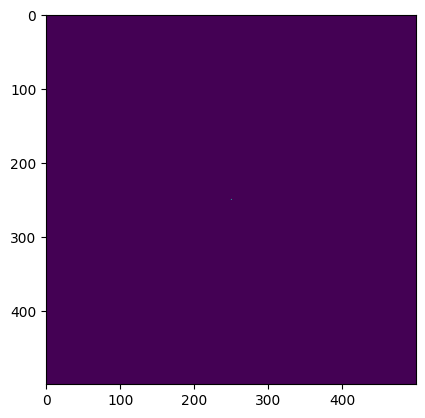

In [159]:
plt.imshow(arr)

In [160]:
def update_positions(head: list, tail: list, direction: str):
    last_head = head.copy()
    if direction == "U":
        head[0] -= 1
    elif direction == "D":
        head[0] += 1
    elif direction == "R":
        head[1] += 1
    else:
        head[1] -= 1

    if abs(head[0] - tail[0]) > 1 or abs(head[1] - tail[1]) > 1:
        # need to update tail
        tail = last_head.copy()
        # arr[tail[0], tail[1]] = 1
    return head, tail

In [161]:
for entry in data:
    direction, n_moves = entry.split(" ")
    for move in range(int(n_moves)):
        h, t = update_positions(h, t, direction)
        arr[t[0], t[1]] = 1

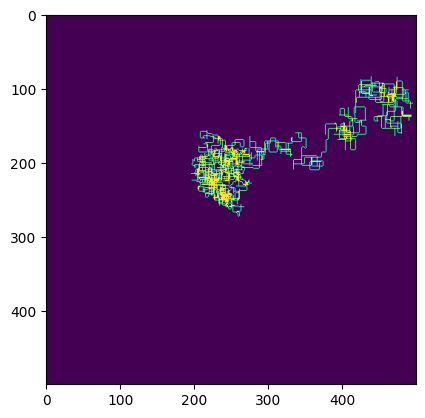

In [162]:
plt.imshow(arr)

In [163]:
answer = np.sum(arr)

5695.0

In [ ]:
submit_answer(answer, day=day, part=part, year=year)

# Part Two

A rope snaps! Suddenly, the river is getting a lot closer than you remember. <br>The bridge is still there, but some of the ropes that broke are now whipping toward you as you fall through the air!

The ropes are moving too quickly to grab; you only have a few seconds to choose how to arch your body to avoid being hit.<br> Fortunately, your simulation can be extended to support longer ropes.

Rather than two knots, you now must simulate a rope consisting of ten knots. One knot is still the head of the rope and<br> moves according to the series of motions. Each knot further down the rope follows the knot in front of it using the same rules as before.<br>

Using the same series of motions as the above example, but with the knots marked H, 1, 2, ..., 9, the motions now occur as follows:

Simulate your complete series of motions on a larger rope with ten knots. How many positions does the tail of the rope visit at least once?

For a given knot:
1) If the knot is the head of the rope, just update the position according to the new instruction
2) If the knot has a preceeding knot, check to see if this knot is more than one movement away from proceeding knot.   
    If so, then move this knot to last position of preceding knot
3) If the knot has a next knot, move to it and check position. Else break and update the matrix positions of rope tail. 

In [ ]:
part = "b"

In [496]:
class Knot:
    def __init__(self, i: int):
        self.previous = None
        self.next = None
        self.position = None
        self.previous_position = None
        self.i = i
        
    def set_previous(self, previous_knot):
        self.previous = previous_knot
    
    def set_next(self, next_knot):
        self.next = next_knot
        
    def set_position(self, new_position: list):
        if self.position is not None:
            self.previous_position = self.position.copy()
        self.position = new_position.copy()
        
    def is_touching_previous(self, position=None):
        """ Return True if next to update the position"""
        position = self.position if position is None else position
        return abs(position[0] - self.previous.position[0]) > 1 or abs(position[1] - self.previous.position[1]) > 1
        
    def check_distance_from_previous(self, position=None):
        position = self.position if position is None else position
        if position[0] - self.previous.position[0] > 1 and position[1] == self.previous.position[1]:
            return "U"
        elif position[0] - self.previous.position[0] < -1 and position[1] == self.previous.position[1]:
            return "D"
        elif position[1] - self.previous.position[1] > 1 and position[0] == self.previous.position[0]:
            return "L"
        elif position[1] - self.previous.position[1] < -1 and position[0] == self.previous.position[0]:
            return "R"
        else:
            return None
        # return abs(position[0] - self.previous.position[0]) > 1 or abs(position[1] - self.previous.position[1]) > 1

In [535]:
knots = []
n = 50
for i in range(10):
    knot = Knot(i)
    knot.set_position([n//2, n//2])
    if i == 0:
        knots.append(knot)
    else:
        knots[i-1].set_next(knot)
        knot.set_previous(knots[i-1])
        knots.append(knot)

In [526]:
def update_position(knot, direction: str):
    pos = knot.position.copy()
    if direction == "U":
        pos[0] -= 1
    elif direction == "D":
        pos[0] += 1
    elif direction == "R":
        pos[1] += 1
    else:
        pos[1] -= 1
    knot.set_position(pos)
    return knot

In [527]:
test_data = ['R 4', 'U 4', 'L 3', 'D 1', 'R 4', 'D 1', 'L 5', 'R 2']

In [536]:
def run_simulation(data: list, n: int, verbose: bool):

    arr = np.zeros([n, n])
    
    knots = []
    for i in range(10):
        knot = Knot(i)
        knot.set_position([n//2, n//2])
        if i == 0:
            knots.append(knot)
        else:
            knots[i-1].set_next(knot)
            knot.set_previous(knots[i-1])
            knots.append(knot)
    
    tmp_arrs = []
    for entry in data:
        if verbose:
            print(entry)
        direction, n_moves = entry.split(" ")
        for move in range(int(n_moves)):
            for k in knots:
                if k.previous is None:
                    k = update_position(k, direction)
                    if verbose:
                        print(f"Position of {k.i} updated from {k.previous_position} to {k.position}")
                else:
                    new_direction = k.check_distance_from_previous()
                    if new_direction is not None:
                        k = update_position(k, new_direction)
                    else:
                        if k.is_touching_previous():
                            ur = [k.position[0]-1, k.position[1]+1]
                            ul = [k.position[0]-1, k.position[1]-1]
                            dr = [k.position[0]+1, k.position[1]+1]
                            dl = [k.position[0]+1, k.position[1]-1]
                            for pp in [ur, ul, dr, dl]:
                                if not k.is_touching_previous(position=pp):
                                    k.set_position(pp)
                                    break
                    if k.next is None:
                        arr[k.position[0], k.position[1]] = 1

            tmp_arr = np.zeros_like(arr)
            for i, k in enumerate(knots):
                if i == 0:
                    tmp_arr[k.position[0], k.position[1]] = 50 - (2*i)
                else:
                    tmp_arr[k.position[0], k.position[1]] = 50- (2*i)
            tmp_arrs.append(tmp_arr)
    return arr, tmp_arrs

## Test data

In [194]:
data = read_sample_data(9)

In [ ]:
arr, tmp_arrs = run_simulation(data, 50, False)

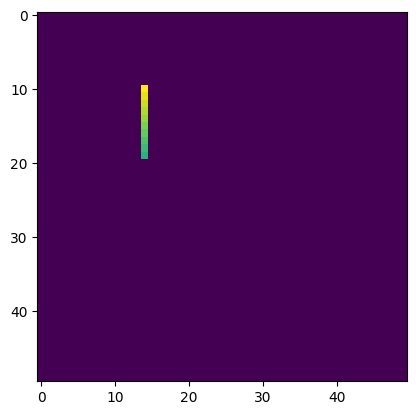

In [538]:
plt.imshow(tmp_arrs[-1])

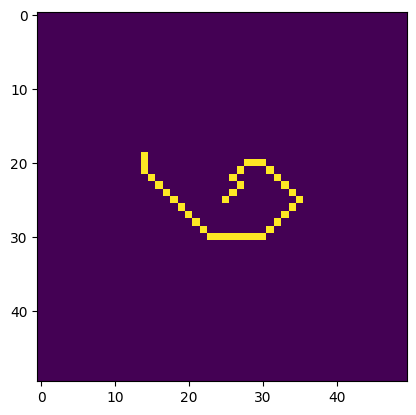

In [539]:
plt.imshow(arr)

## Real data


In [540]:
data = get_puzzle(day=day, year=year)

In [541]:
data = data.split("\n")

In [543]:
arr, tmp_arrs = run_simulation(data, 500, False)

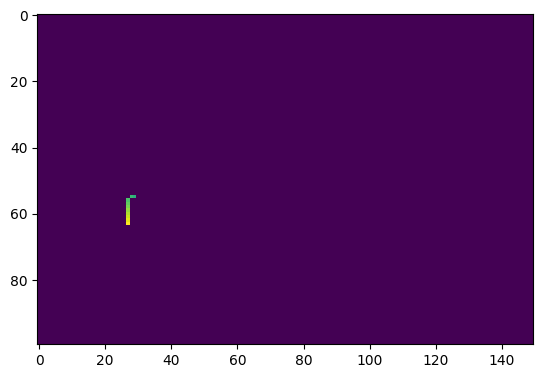

In [547]:
plt.imshow(tmp_arrs[-1][100:200, 350:])

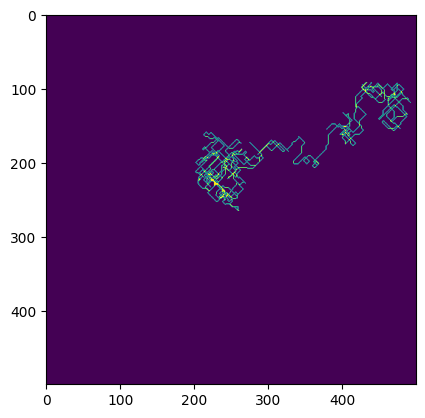

In [545]:
plt.imshow(arr)

In [546]:
answer = np.sum(arr)

2434.0

In [ ]:
submit_answer(answer, day=day, part=part, year=year)